[0 1]
Iteration Number  0
Iteration Number  10
Iteration Number  20
Iteration Number  30
Iteration Number  40
Iteration Number  50
Iteration Number  60
Iteration Number  70
Iteration Number  80
Iteration Number  90
Iteration Number  100
Iteration Number  110
Iteration Number  120
Iteration Number  130
Iteration Number  140
Iteration Number  150
Iteration Number  160
Iteration Number  170
Iteration Number  180
Iteration Number  190
Iteration Number  200
Iteration Number  210
Iteration Number  220
Iteration Number  230
Iteration Number  240
Iteration Number  250
Iteration Number  260
Iteration Number  270
Iteration Number  280
Iteration Number  290
Iteration Number  300
Iteration Number  310
Iteration Number  320
Iteration Number  330
Iteration Number  340
Iteration Number  350
Iteration Number  360
Iteration Number  370
Iteration Number  380
Iteration Number  390


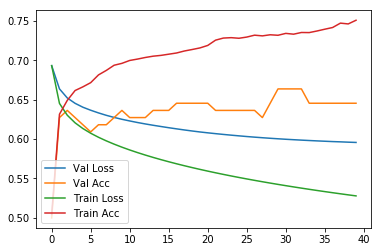

Final Accuracy:  0.7511049374921076
Final Validatin Accuracy:  0.6454545454545455


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd


# Sigmoid function
def logistic(x):
    return 1.0 / (1.0 + np.exp(-1.0*x))



def hypothesisLogistic(X, coefficients, bias):
    
    # array of zeros. Length is same as number of training rows.  
    predictedValues = np.zeros(X.shape[0])
    
    # for each feature multiple the X training data by the appropriate 
    # coefficient and add to to predictedvalues
    for num in range(len(coefficients)):
        predictedValues += coefficients[num] * X[:, num]
    
    # finally add the current bias to each of the predicted values
    predictedValues += bias
    
    logisticPredicitons = logistic(predictedValues)
    
    return logisticPredicitons


def calculateCrossEntropyCost(predictedY, y):
    return np.average(((-1*y)*(np.log(predictedY)))- ((1-y)*(np.log(1-predictedY))))


def gradient_descent_log(bias, coefficients, alpha, X, y, max_iter, X_val, y_val):

    length = len(y)
    
    # array is used to store change in cost function for each iteration of GD
    trainingLoss= []
    validationLoss= []
    trainingAccuracies = []
    validationAccuracies = []
    
    for num in range(0, max_iter):
                
        # Calculate predicted y values for current coefficient and bias values 
        predictedY = hypothesisLogistic(X, coefficients, bias)

        if num%10 == 0: 
            print ("Iteration Number ", num)
            
            # Cross Entropy Error  and accuracy for training data
            trainCost = calculateCrossEntropyCost(predictedY, y)
            trainingLoss.append(trainCost)
            trainAccuracy = calculateAccuracy(predictedY, y)
            trainingAccuracies.append(trainAccuracy)
            
            # Cross Entropy Error  and accuracy for validation data
            predictedYVal = hypothesisLogistic(X_val, coefficients, bias)
            valCost = calculateCrossEntropyCost(predictedYVal, y_val)
            validationLoss.append(valCost)
            valAccuracy = calculateAccuracy(predictedYVal, y_val)
            validationAccuracies.append(valAccuracy)


        # calculate gradient for bias
        biasGrad =    (1.0/length) *  (np.sum( predictedY - y))
        #update bias using GD update rule
        bias = bias - (alpha*biasGrad)
        
        # for loop to update each coefficient value in turn
        for coefNum in range(len(coefficients)):
            
            # calculate the gradient of the coefficient
            gradCoef = (1.0/length)* (np.sum( (predictedY - y)*X[:, coefNum]))
            # update coefficient using GD update rule
            coefficients[coefNum] = coefficients[coefNum] - (alpha*gradCoef)
        
   
    # plot the cost for each iteration of gradient descent
    plt.plot(validationLoss, label="Val Loss")
    plt.plot(validationAccuracies, label="Val Acc")
    plt.plot(trainingLoss, label="Train Loss")
    plt.plot(trainingAccuracies, label="Train Acc")
    plt.legend()
    
    plt.show()
    
    return bias, coefficients


def calculateAccuracy(predictedYValues, Y):
    

    # Logistic regression is a probabilistic classifier.
    # If the probability is less than 0.5 set class to 0
    # If probability is greater than 0.5 set class to 1 
    predictedYValues[predictedYValues <= 0.5] = 0
    predictedYValues[predictedYValues > 0.5] = 1

    return (np.sum(predictedYValues==Y)/len(Y))
    

def logisticRegression(X_train, y_train, X_validation, y_validation):

    
    # set the number of coefficients equal to the number of features
    coefficients = np.zeros(X_train.shape[1])
    bias = 0.0
   
    alpha = 0.005 # learning rate
    
    max_iter=400


            
    # call gredient decent, and get intercept(bias) and coefficents
    bias, coefficients = gradient_descent_log(bias, coefficients, alpha, X_train, y_train, max_iter, X_validation, y_validation)
    
    predictedY = hypothesisLogistic(X_train, coefficients, bias)
    print ("Final Accuracy: ",calculateAccuracy(predictedY, y_train))
    
    predictedYVal = hypothesisLogistic(X_validation, coefficients, bias)
    print ("Final Validatin Accuracy: ",calculateAccuracy(predictedYVal, y_validation))
    
    


def main():
    
    # Initially we load training and validation data
    
    df=pd.read_csv('data/train.csv', sep=',',header=None)
    trainData = df.values
    
    train_set_x_orig = trainData[:, 0:-1]
    train_set_y = trainData[:, -1]
    
    train_set_y = train_set_y.astype(np.int32)
    print (np.unique(train_set_y))

    df=pd.read_csv('data/validation.csv', sep=',',header=None)
    validationData = df.values
    
    validation_set_x_orig = validationData[:, 0:-1]
    validation_set_y = validationData[:, -1]
    validation_set_y = validation_set_y.astype(np.int32)

  

    # Standarize the data
    scaler = preprocessing.StandardScaler()
    train_set_x_orig = scaler.fit_transform(train_set_x_orig)
    validation_set_x_orig = scaler.fit_transform(validation_set_x_orig)
  
    # Call Logistic Regression Unit
    logisticRegression(train_set_x_orig, train_set_y, validation_set_x_orig, validation_set_y)
    
    
main()